<a href="https://colab.research.google.com/github/MahalakshmiDSML/Machine-Learning-Assignment---6/blob/main/ML_Assignment_6_Supervised_Model_Comparison_and_k_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ML Assignment 6: Supervised Model Comparison and k-Means Clustering**

##**Supervised Learning Model Comparison**

###**Life Expectancy (WHO) Analysis**


##**Model Comparison Steps:-**

###**1.	Initial Exploration and Pre-Processing:**


###**1.1.	Load the dataset and perform an initial exploration to understand its structure and content.**







In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###**1.2.	Determine the number of unique values in the 'Country' and 'Year' columns.**

In [ ]:
df=pd.read_csv("/content/Supervised Learning Model Comparison  data.txt")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
df.shape

(2938, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
2933,False
2934,False
2935,False
2936,False


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# Rename column the columns are has some spaces.
df=df.rename(columns={'Life expectancy ':'Life_expectancy', 'Adult Mortality':'Adult_Mortality',
       'infant deaths':'infant_deaths', 'percentage expenditure':'percentage_expenditure', 'Hepatitis B':'Hepatitis_B',
       'Measles ':'Measles', ' BMI ':'BMI', 'under-five deaths ':'under_five_deaths', 'Total expenditure':'Total_expenditure',
       'Diphtheria ':'Diphtheria', ' HIV/AIDS':'HIV_AIDS', ' thinness  1-19 years':'thinness_1_to_19_years',
       ' thinness 5-9 years':'thinness_5_to_9_years', 'Income composition of resources':'Income_composition_of_resources'})

In [ ]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'thinness_1_to_19_years',
       'thinness_5_to_9_years', 'Income_composition_of_resources',
       'Schooling'],
      dtype='object')

In [ ]:
df.isna().sum()

,0
Country,0
Year,0
Status,0
Life_expectancy,10
Adult_Mortality,10
infant_deaths,0
Alcohol,194
percentage_expenditure,0
Hepatitis_B,553
Measles,0


In [ ]:
nullcount=df.isna().sum()
nullcount[nullcount>0]

,0
Life_expectancy,10
Adult_Mortality,10
Alcohol,194
Hepatitis_B,553
BMI,34
Polio,19
Total_expenditure,226
Diphtheria,19
GDP,448
Population,652


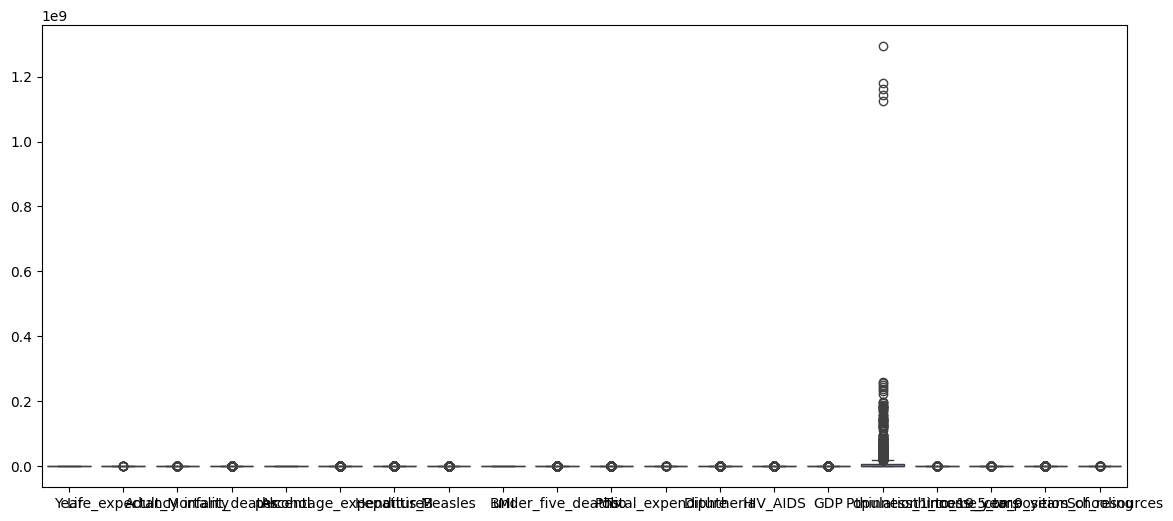

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df)
plt.show()

**In this dataset has no duplicate values. Some column has null values.**

###**1.3.	Analyze the distribution of values in the 'Status' column. If the dataset is imbalanced, consider using appropriate metrics for evaluation.**

In [ ]:
df['Status'].nunique()

2

In [ ]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [ ]:
df['Status'].value_counts()

,count
Status,
Developing,2426
Developed,512


In [ ]:
# need percentage
df['Status'].value_counts(normalize=True) * 100

,proportion
Status,
Developing,82.573179
Developed,17.426821


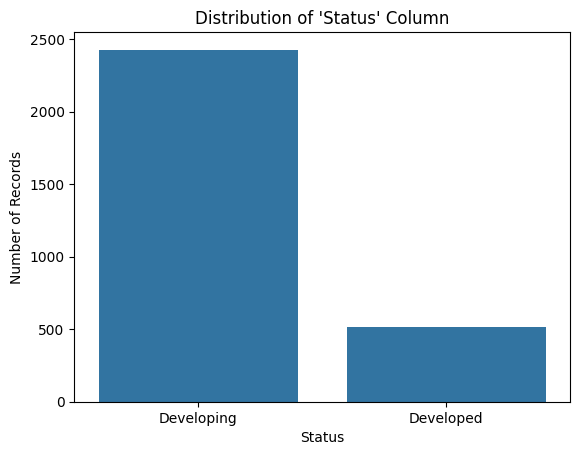

In [ ]:
sns.countplot(x='Status', data=df)
plt.title("Distribution of 'Status' Column")
plt.ylabel("Number of Records")
plt.show()

In [ ]:
df['Country'].nunique()

193

In [ ]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [ ]:
df['Country'].value_counts()

,count
Country,
Afghanistan,16
Albania,16
Algeria,16
Angola,16
Antigua and Barbuda,16
...,...
Monaco,1
Marshall Islands,1
Saint Kitts and Nevis,1


In [ ]:
# Evalution metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,mean_squared_error,r2_score

In [ ]:
X=df.drop(columns='Status')
y=df['Status']

In [ ]:
X.shape

(2938, 21)

In [ ]:
y.shape

(2938,)

In [ ]:
# Label Encoding
label=LabelEncoder()
df['Status']=label.fit_transform(df['Status'])
df['Country']=label.fit_transform(df['Country'])

In [ ]:
df.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1_to_19_years,thinness_5_to_9_years,Income_composition_of_resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df['Status'].unique()

array([1, 0])

In [ ]:
# Train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# Train model
model=RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#predict
Y_pred=model.predict(X_test)

In [ ]:
#Confusion Matrix
cm=confusion_matrix(y_test,Y_pred)
print(f"\n Confusion Matrix:{cm}")


 Confusion Matrix:[[ 93   4]
 [  1 490]]


In [ ]:
TN,FP,FN,TP=cm.ravel()
print(f"\n True Positives(TP):{TP}")
print(f"\n True Negative(TN):{TN}")
print(f"\n False Positives(FP):{FP}")
print(f"\n False Negative(FN):{FN}")


 True Positives(TP):490

 True Negative(TN):93

 False Positives(FP):4

 False Negative(FN):1


In [ ]:
# Evaluation metrics:
accuracy=accuracy_score(y_test,Y_pred)
mse=mean_squared_error(y_test,Y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,Y_pred)
precision=precision_score(y_test,Y_pred)
recall=recall_score(y_test,Y_pred)
f1=f1_score(y_test,Y_pred)

print("Evaluation metrics:")
print(f"\n Accuracy:{accuracy:.4f}")
print(f"\n RMSE:{rmse:.4f}")
print(f"\n R2_Score:{r2:.4f}")
print(f"\n Precisions:{precision:.4f}")
print(f"\n Recall:{recall:.4f}")
print(f"\n F1-Score:{f1:.4f}")

Evaluation metrics:

 Accuracy:0.9915

 RMSE:0.0922

 R2_Score:0.9383

 Precisions:0.9919

 Recall:0.9980

 F1-Score:0.9949


##**This dataset is Excellent Data.**
###**R2 Score is 0.9 & RMSE id 0.1**

###**1.4.	Check for any missing values. Impute missing values for all numerical columns using the median or another suitable strategy.**

In [ ]:
nullcount=df.isna().sum()
nullcount[nullcount>0]

,0
Life_expectancy,10
Adult_Mortality,10
Alcohol,194
Hepatitis_B,553
BMI,34
Polio,19
Total_expenditure,226
Diphtheria,19
GDP,448
Population,652


In [ ]:
numerical_df=df.select_dtypes(include='number')
print("Mean value:\n",numerical_df.mean())


Mean value:
 Year                               2.007519e+03
Life_expectancy                    6.922493e+01
Adult_Mortality                    1.647964e+02
infant_deaths                      3.030395e+01
Alcohol                            4.602861e+00
percentage_expenditure             7.382513e+02
Hepatitis_B                        8.094046e+01
Measles                            2.419592e+03
BMI                                3.832125e+01
under_five_deaths                  4.203574e+01
Polio                              8.255019e+01
Total_expenditure                  5.938190e+00
Diphtheria                         8.232408e+01
HIV_AIDS                           1.742103e+00
GDP                                7.483158e+03
Population                         1.275338e+07
thinness_1_to_19_years             4.839704e+00
thinness_5_to_9_years              4.870317e+00
Income_composition_of_resources    6.275511e-01
Schooling                          1.199279e+01
dtype: float64


In [ ]:
for col in numerical_df:
  df[col]=df[col].fillna(df[col].mean())

In [ ]:
nullcount=df.isna().sum()
nullcount[nullcount>0]

,0


In [ ]:
df.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1_to_19_years,thinness_5_to_9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


###**1.5.	Optionally, you may perform a comprehensive EDA to visualize relationships, distributions, and patterns in the data.**

In [ ]:
df.describe()

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1_to_19_years,thinness_5_to_9_years,Income_composition_of_resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'thinness_1_to_19_years',
       'thinness_5_to_9_years', 'Income_composition_of_resources',
       'Schooling'],
      dtype='object')

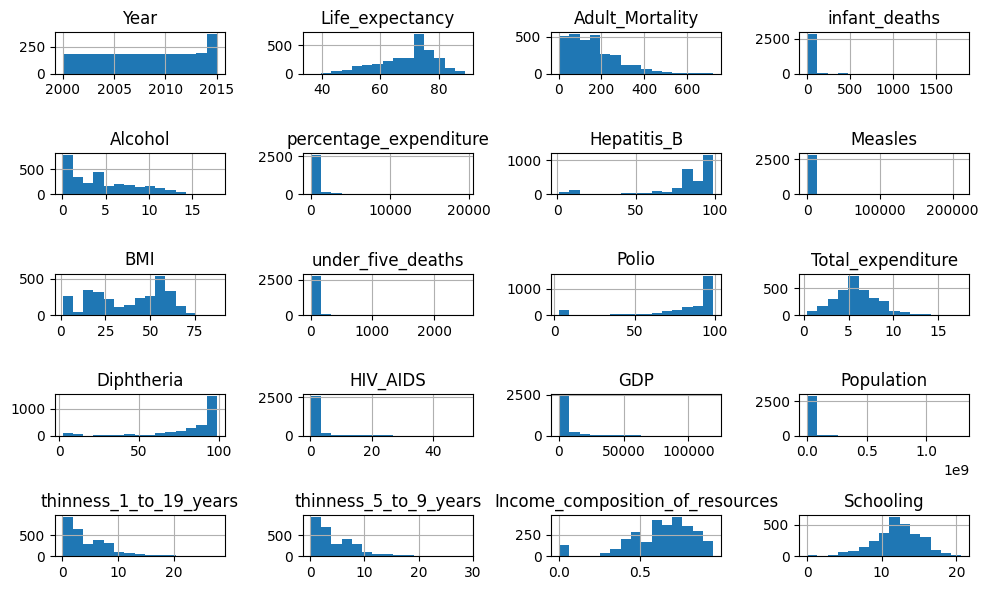

In [ ]:
df.hist(bins=15,figsize=(10,6))
plt.tight_layout()
plt.show()

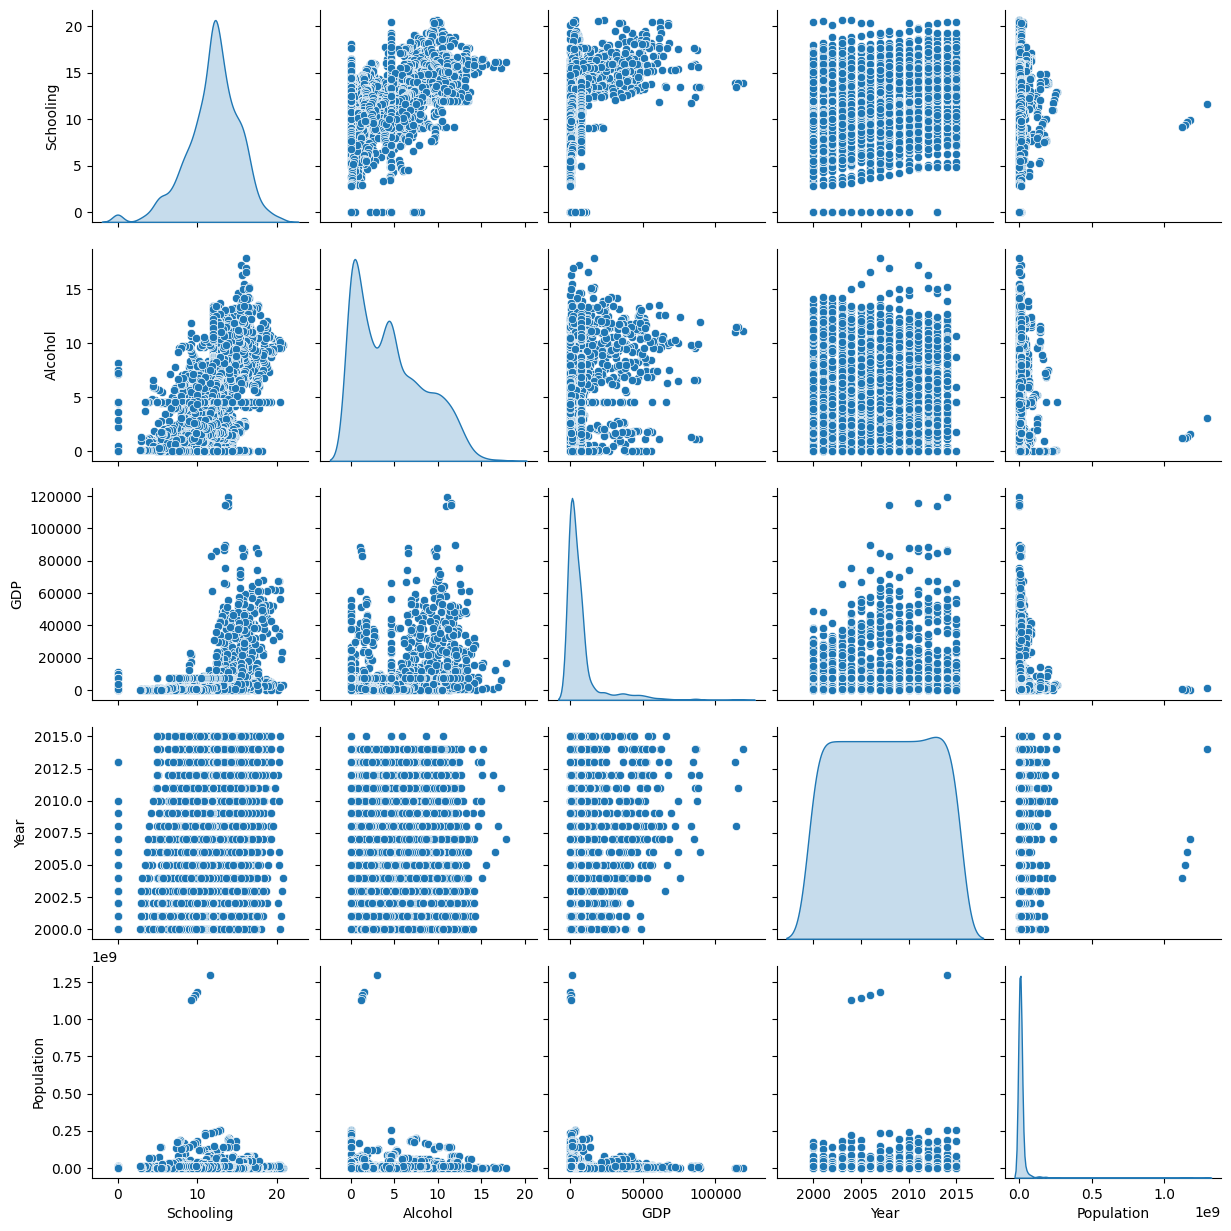

In [ ]:
sns.pairplot(df[['Schooling', 'Alcohol', 'GDP', 'Year','Population']], diag_kind='kde')
plt.show()

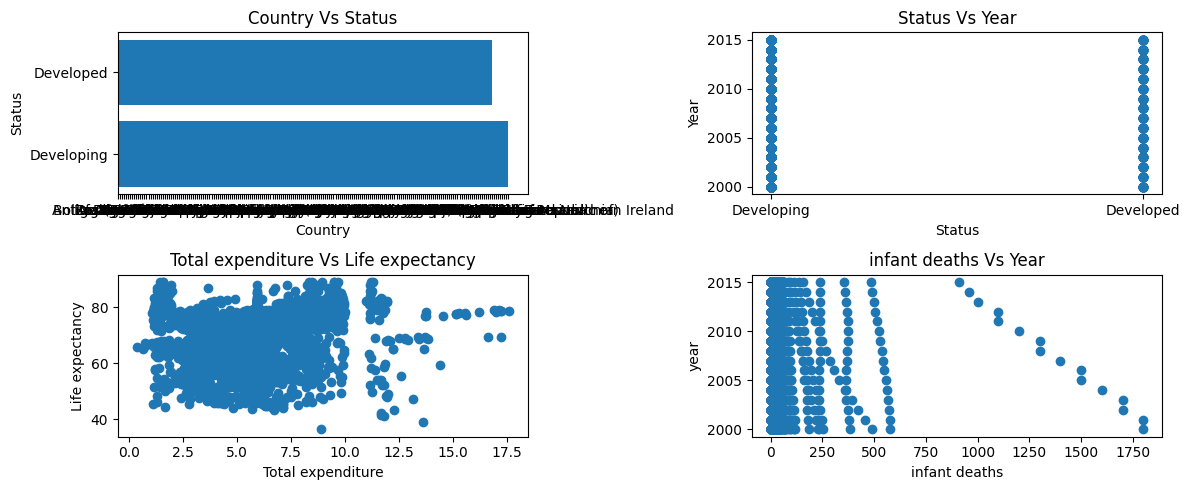

In [ ]:
plt.figure(figsize=(12,5))
# Country Vs Status
plt.subplot(2,2,1)
plt.barh(df['Status'],df['Country'])
plt.title("Country Vs Status")
plt.xlabel("Country")
plt.ylabel("Status")

# Year Vs Status
plt.subplot(2,2,2)
plt.scatter(df['Status'],df['Year'])
plt.title("Status Vs Year")
plt.xlabel("Status")
plt.ylabel("Year")

# Total expenditure Vs Life expectancy
plt.subplot(2,2,3)
plt.scatter(df['Total_expenditure'],df['Life_expectancy'])
plt.title("Total expenditure Vs Life expectancy")
plt.xlabel("Total expenditure")
plt.ylabel("Life expectancy")

# infant deaths Vs Year
plt.subplot(2,2,4)
plt.scatter(df['infant_deaths'],df['Year'])
plt.title("infant deaths Vs Year")
plt.xlabel("infant deaths")
plt.ylabel("year")

plt.tight_layout()
plt.show()

###**1.6.	Encode categorical columns appropriately.**

In [ ]:
df['Country'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  44,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
df['Status'].unique()

array([1, 0])

##**2.	Classification Models Comparison:**

###**2.1.	Define 'Status' as the target variable and use all other columns as features.**






In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])  # Developed = 0, Developing = 1


In [ ]:
X = df.drop(columns=['Status', 'Country', 'Year'])  # exclude target & non-numeric
y = df['Status']

###**2.2.	Split the data into training and testing sets.**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

###**2.3.	Scale all feature columns, excluding 'Country' and 'Year'.**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###**2.4.	Compare classification models including Logistic Regression, K-Neighbors Classifier, Decision Tree Classifier, Random Forest Classifier, Support Vector Classifier, Gaussian Naive Bayes, and XGBoost. Report both accuracy and F1-scores for each model. Optionally, you may perform hyperparameter tuning to optimize model performance.**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,f1_score

In [ ]:
models={'Logistic Regression':LogisticRegression(),
        'KNeighbors Classifier':KNeighborsClassifier(),
        'Decision Tree':DecisionTreeClassifier(max_depth=5,random_state=42),
        'Random Forest':RandomForestClassifier(n_estimators=100,max_depth=5,random_state=42),
        'Support Vector':SVC(),
        'Gaussian Naive Bayes':GaussianNB(),
        'XGBoost':XGBClassifier(n_estimators=100,learning_rate=0.1,max_depth=5,eval_metric='logloss',random_state=42)}

In [ ]:
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({'Model': name, 'Accuracy': acc, 'F1 Score': f1})

In [ ]:
final_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
print(final_df)

                   Model  Accuracy  F1 Score
6                XGBoost  0.984694  0.990807
3          Random Forest  0.955782  0.973251
2          Decision Tree  0.955782  0.973140
1  KNeighbors Classifier  0.948980  0.969199
4         Support Vector  0.938776  0.962963
0    Logistic Regression  0.928571  0.956701
5   Gaussian Naive Bayes  0.778912  0.848837


In [ ]:
print("\n \n --- Hyperparameter Tuning(XGBoost)")
param_grid={'n_estimators':[100,150,200],
            'max_depth':[4,5,6,]}
grid_search=GridSearchCV(XGBClassifier(random_state=42),param_grid,cv=3,scoring='accuracy')
grid_search.fit(X_train,y_train)
print("Best Parameters:",grid_search.best_params_)
print("Best Accuracy:",grid_search.best_score_)
best_Xgb=grid_search.best_estimator_
best_pred=best_Xgb.predict(X_test)
print("Accuracy(Tuuned XGBoost):",grid_search.best_score_)


 
 --- Hyperparameter Tuning(XGBoost)
Best Parameters: {'max_depth': 5, 'n_estimators': 100}
Best Accuracy: 0.97914548961347
Accuracy(Tuuned XGBoost): 0.97914548961347


###**2.5.	Identify and report the best-performing classification model for this dataset.**

In [ ]:
best_index = np.argmax(final_df['F1 Score'].values)

best_model = final_df['Model'].values[best_index]
best_accuracy = final_df['Accuracy'].values[best_index]
best_f1 = final_df['F1 Score'].values[best_index]

# Print the result
print(f'Best Model: {best_model}, Highest Accuracy: {best_accuracy:.4f}, Highest F1 Score: {best_f1:.4f}')

Best Model: XGBoost, Highest Accuracy: 0.9847, Highest F1 Score: 0.9908


##**3.	Regression Models Comparison:**

###**3.1.	Define 'Life expectancy' as the target variable and use all other columns as features.**






In [ ]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'thinness_1_to_19_years',
       'thinness_5_to_9_years', 'Income_composition_of_resources',
       'Schooling'],
      dtype='object')

In [ ]:
X = df.drop(columns=['Status', 'Country', 'Year','Life_expectancy'])
y = df['Life_expectancy']

###**3.2.	Split the data into training and testing sets.**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

###**3.3.	Scale all feature columns, excluding 'Country', 'Year', and 'Status'.**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###**3.4.	Compare regression models including Linear Regression, Decision Tree Regressor, Random Forest Regressor, Support Vector Regressor, and K-Neighbors Regressor. Report R² score and Mean Absolute Error for each model. Optionally, you may perform hyperparameter tuning to enhance performance.**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
models={'Linear Regression':LinearRegression(),
        'KNeighbors Regression':KNeighborsRegressor(),
        'Decision Tree Regression':DecisionTreeRegressor(max_depth=5,random_state=42),
        'Random Forest Regression':RandomForestRegressor(n_estimators=100,max_depth=5,random_state=42),
        'Support Vector Regression':SVR(),
        'XGBoost Regression':XGBRegressor(n_estimators=100,learning_rate=0.1,eval_metric='logloss',random_state=42)}

In [ ]:
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    MSE = mean_squared_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)
    results.append({'Model': name, 'MSE':MSE, 'R2 Score':R2})

In [ ]:
reg_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
print(reg_df)

                       Model        MSE  R2 Score
5         XGBoost Regression   3.071551  0.964546
3   Random Forest Regression   5.987326  0.930890
1      KNeighbors Regression   6.892287  0.920445
2   Decision Tree Regression   8.787891  0.898565
4  Support Vector Regression  10.920515  0.873948
0          Linear Regression  15.373769  0.822546


In [ ]:
print("\n \n --- Hyperparameter Tuning(XGBoost)")
param_grid_reg={'n_estimators':[100,150,200],
            'max_depth':[4,5,6,]}
grid_search_reg=GridSearchCV(XGBRegressor(random_state=42),param_grid,cv=3,scoring='r2')
grid_search_reg.fit(X_train,y_train)
print("Best Parameters:",grid_search_reg.best_params_)
print("Best R2 score:",grid_search_reg.best_score_)
best_Xgb_reg=grid_search_reg.best_estimator_
best_pred_reg=best_Xgb_reg.predict(X_test)
print("Accuracy(Tuuned XGBoost):",grid_search_reg.best_score_)


 
 --- Hyperparameter Tuning(XGBoost)
Best Parameters: {'max_depth': 5, 'n_estimators': 200}
Best R2 score: 0.9493840649212638
Accuracy(Tuuned XGBoost): 0.9493840649212638


###**3.5.	Identify and report the best-performing regression model for this dataset.**

In [ ]:
best_reg = np.argmax(reg_df['R2 Score'].values)

best_model = reg_df['Model'].values[best_reg]
best_MSE = reg_df['MSE'].values[best_reg]
best_R2 = reg_df['R2 Score'].values[best_reg]

# Print the result
print(f'Best Model: {best_model}, LOwest MSE: {best_MSE:.4f}, Highest R2 Score: {best_R2:.4f}')

Best Model: XGBoost Regression, LOwest MSE: 3.0716, Highest R2 Score: 0.9645


#**Unsupervised Learning – k-Means**

##**Customer Segmentation**


##**k-Means Clustering Steps:**

###**➔	Initial Visualization: Create a scatter plot using 'Annual Income (k$)' on the x-axis and 'Spending Score (1-100)' on the y-axis to visualize the data distribution.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
kdf=pd.read_csv("/content/Unsupervised Learning – k-Means data.txt")
kdf.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
kdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


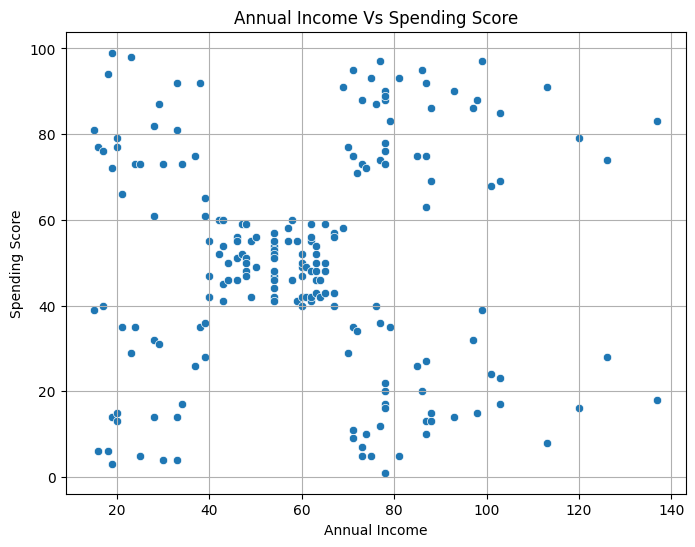

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=kdf,x='Annual Income (k$)',y='Spending Score (1-100)')
plt.title("Annual Income Vs Spending Score")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.grid(True)
plt.show()

###**➔	Feature Selection: Select 'Annual Income (k$)' and 'Spending Score (1-100)' as the features for k-Means clustering.**

In [ ]:
X=kdf[['Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

###**➔	Determine Optimal k-Value: Calculate the Within-Cluster Sum of Squares (WCSS) for a range of k-values.**

In [ ]:
k_range = range(1, 11)
wcss = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

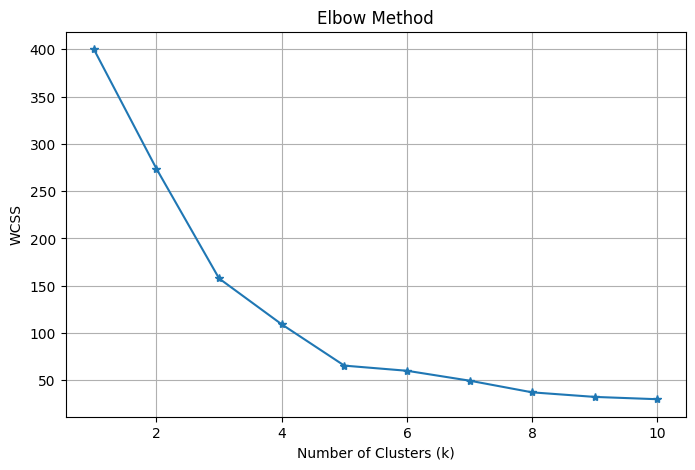

In [ ]:

plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='*')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

**Optimal K vlue is : 5**

###**➔	Plot the Elbow Chart: Plot the elbow method graph to visually determine the optimal k-value.**

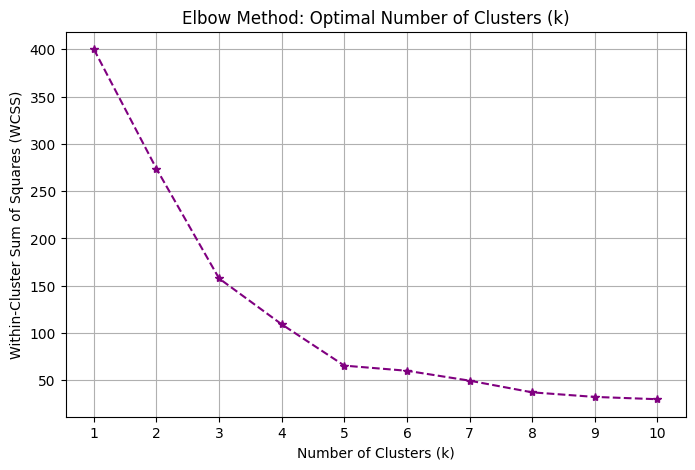

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='*', linestyle='--', color='purple')
plt.title('Elbow Method: Optimal Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

##**➔	Build k-Means Model:**

###**◆	Construct the k-Means model using the optimal k-value determined in the previous step.**

In [ ]:
centroids=kmeans.cluster_centers_
centroids

array([[ 0.07722948, -0.11290604],
       [ 1.39436395,  1.39334111],
       [ 0.73205646, -1.42897101],
       [-1.35921337,  1.19570407],
       [-1.37320883, -1.57680239],
       [ 0.62597864,  1.18793976],
       [-0.55987331,  0.08456805],
       [ 1.87564575, -1.09476801],
       [-1.23585672, -0.65714315],
       [ 2.56142316,  1.10512043]])

In [ ]:
kdf.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
kmeans=KMeans(n_clusters=5,init='k-means++',n_init=10,random_state=42)
y_means=kmeans.fit_predict(X_scaled)

In [ ]:
y_means

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [ ]:
kdf.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
kdf['cluster']=y_means

In [ ]:
kdf.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [ ]:
kdf['cluster'].unique()

array([4, 2, 0, 1, 3], dtype=int32)

In [ ]:
kdf['cluster'].value_counts().reset_index()

,cluster,count
0,0,81
1,1,39
2,3,35
3,4,23
4,2,22


###**◆	Identify the clusters and centroids from the model.**

In [ ]:
centroidx=centroids[:,0]
centroidx

array([ 0.07722948,  1.39436395,  0.73205646, -1.35921337, -1.37320883,
        0.62597864, -0.55987331,  1.87564575, -1.23585672,  2.56142316])

In [ ]:
centroidy=centroids[:,1]
centroidy

array([-0.11290604,  1.39334111, -1.42897101,  1.19570407, -1.57680239,
        1.18793976,  0.08456805, -1.09476801, -0.65714315,  1.10512043])

###**➔	Visualization of Clusters: Plot the scatter plot again, this time including the centroids. Color the data points according to their respective clusters to visualize the clustering results effectively.**

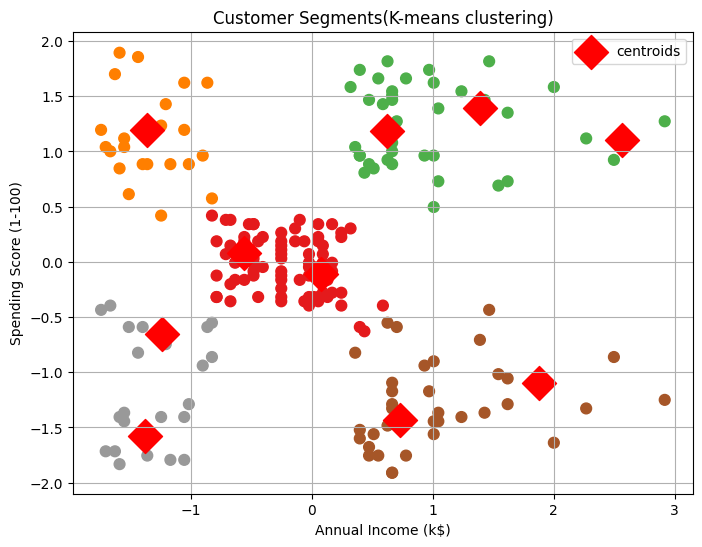

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=X_scaled[:,0],y=X_scaled[:,1],c=y_means, cmap='Set1', s=60)
plt.scatter(centroids[:,0],centroids[:,1],marker='D',s=300,c='red',label='centroids')

plt.title('Customer Segments(K-means clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()